# Clasificación de flores Iris

In [25]:
import pandas as pd
import numpy as np
from sklearn import svm, datasets
import matplotlib.pyplot as plt
%matplotlib inline

In [28]:
mainpath = "../datasets/iris/iris.csv"
#iris = pd.read_csv(mainpath)
iris = datasets.load_iris()
print(iris) #dataarray

{'data': array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
     

In [29]:
X = iris.data[:, :2]
Y = iris.target

In [32]:
x_min, x_max = X[:,0].min()-1, X[:,0].max()+1
y_min, y_max = X[:,1].min()-1, X[:,1].max()+1
h = (x_max - x_min)/100

xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

X_plot = np.c_[xx.ravel(), yy.ravel()]# combinar las xx  y la YY

In [33]:
X_plot

array([[3.3  , 1.   ],
       [3.356, 1.   ],
       [3.412, 1.   ],
       ...,
       [8.732, 5.368],
       [8.788, 5.368],
       [8.844, 5.368]])

In [35]:
C = 1.0
svc = svm.SVC(kernel="linear", C=C, decision_function_shape="ovr").fit(X,Y)
Ypred = svc.predict(X_plot)
Ypred = Ypred.reshape(xx.shape)# agusta el tamaño segun XX

Text(0.5, 1.0, 'SVC para las flores de Iris con Kernel Lineal')

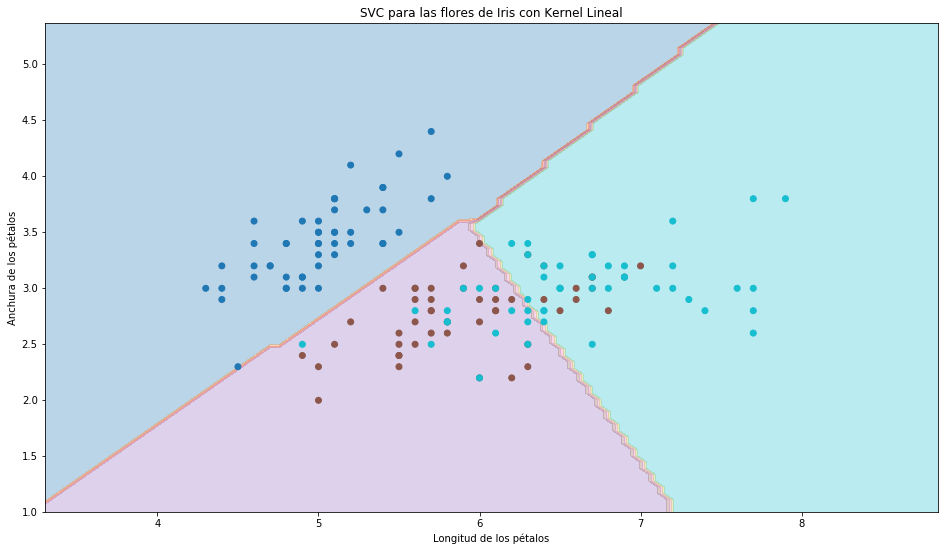

In [38]:
plt.figure(figsize=(16,9))
plt.contourf(xx,yy,Ypred, cmap=plt.cm.tab10, alpha = 0.3)
plt.scatter(X[:,0], X[:,1], c=Y, cmap=plt.cm.tab10)
plt.xlabel("Longitud de los pétalos")
plt.ylabel("Anchura de los pétalos")
plt.xlim(xx.min(), xx.max())
plt.title("SVC para las flores de Iris con Kernel Lineal")

In [39]:
C = 1.0
svc = svm.SVC(kernel="rbf", C=C, decision_function_shape="ovr").fit(X,Y) # kernel="rbf"
Ypred = svc.predict(X_plot)
Ypred = Ypred.reshape(xx.shape)

Text(0.5, 1.0, 'SVC para las flores de Iris con Kernel Radial')

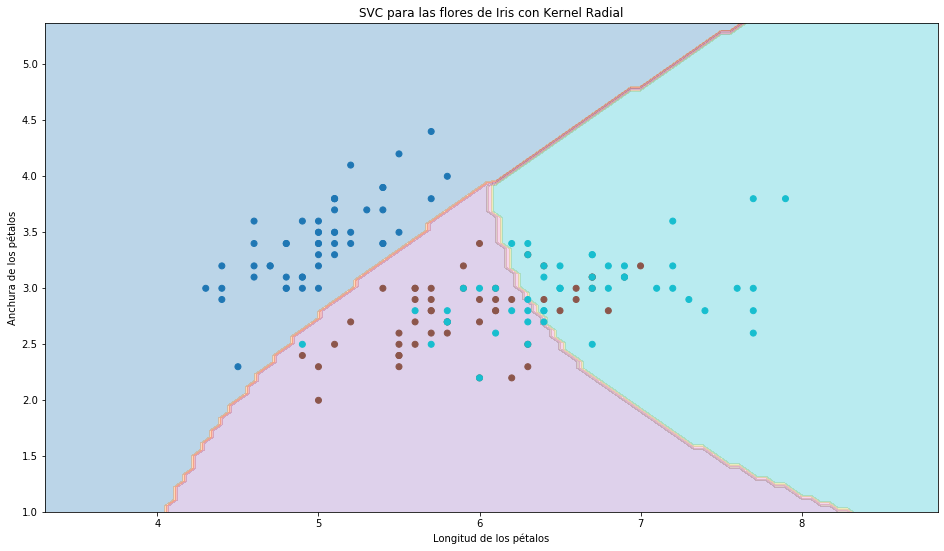

In [42]:
plt.figure(figsize=(16,9))
plt.contourf(xx,yy,Ypred, cmap=plt.cm.tab10, alpha = 0.3)
plt.scatter(X[:,0], X[:,1], c=Y, cmap=plt.cm.tab10)
plt.xlabel("Longitud de los pétalos")
plt.ylabel("Anchura de los pétalos")
plt.xlim(xx.min(), xx.max())
plt.title("SVC para las flores de Iris con Kernel Radial")

Text(0.5, 1.0, 'SVC para las flores de Iris con Kernel Sigmoide')

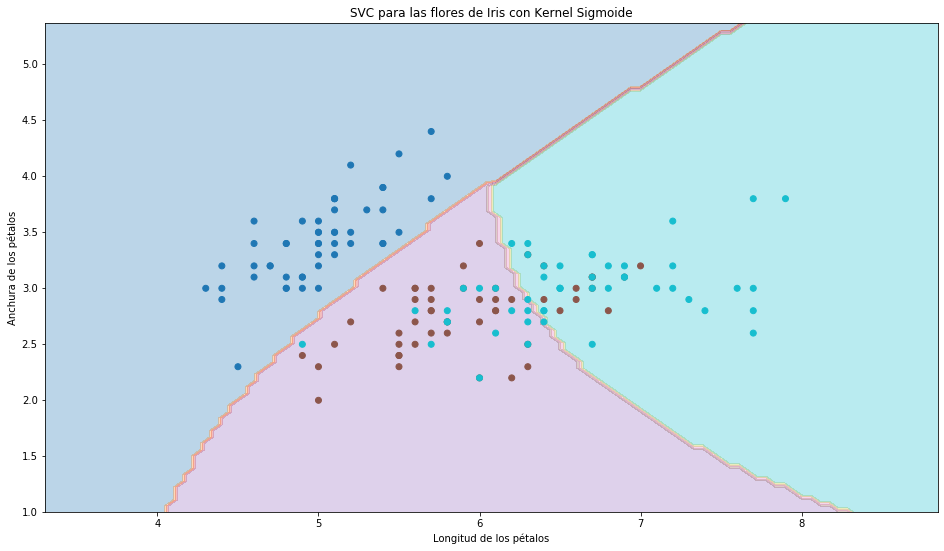

In [43]:
C = 1.0
svc = svm.SVC(kernel="poly", C=C, decision_function_shape="ovr").fit(X,Y) # kernel="poly"
Ypred = svc.predict(X_plot)
Ypred = Ypred.reshape(xx.shape)
plt.figure(figsize=(16,9))
plt.contourf(xx,yy,Ypred, cmap=plt.cm.tab10, alpha = 0.3)
plt.scatter(X[:,0], X[:,1], c=Y, cmap=plt.cm.tab10)
plt.xlabel("Longitud de los pétalos")
plt.ylabel("Anchura de los pétalos")
plt.xlim(xx.min(), xx.max())
plt.title("SVC para las flores de Iris con Kernel Sigmoide")

In [45]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report
from sklearn.utils import shuffle

In [48]:
X, Y = shuffle(X,Y, random_state = 0)# para mesclarlos 

In [49]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25, random_state=0)

In [50]:
parameters = [
    {
        'kernel': ['rbf'],
        'gamma' : [1e-4,1e-3,1e-2, 0.1, 0.2, 0.5],
        'C': [1,10,100,1000]
    },
    {
        'kernel':["linear"],
        'C':[1,10,100,1000]
    }
]

In [51]:
clf = GridSearchCV(svm.SVC(decision_function_shape='ovr'), param_grid=parameters, cv=5)
clf.fit(X,Y)

GridSearchCV(cv=5, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid=[{'C': [1, 10, 100, 1000],
                          'gamma': [0.0001, 0.001, 0.01, 0.1, 0.2, 0.5],
                          'kernel': ['rbf']},
                         {'C': [1, 10, 100, 1000], 'kernel': ['linear']}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [52]:
clf.best_params_

{'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}

In [53]:
clf.cv_results_

{'mean_fit_time': array([0.00243049, 0.0029366 , 0.00276127, 0.00231423, 0.00125751,
        0.00183301, 0.00209022, 0.00193501, 0.001966  , 0.00134869,
        0.00118871, 0.00183897, 0.00216165, 0.00129027, 0.00112629,
        0.00181947, 0.0014616 , 0.00178518, 0.00185471, 0.00114479,
        0.0014945 , 0.00354228, 0.0032228 , 0.00582542, 0.0010407 ,
        0.00104694, 0.00207834, 0.00897107]),
 'std_fit_time': array([2.40068610e-04, 4.63837154e-04, 6.52364968e-04, 3.01706917e-04,
        6.56867373e-05, 4.33809019e-04, 1.02541611e-04, 9.00285729e-05,
        5.93801984e-04, 2.42574772e-04, 5.08035028e-05, 6.00345375e-04,
        2.35541947e-04, 4.08533975e-05, 3.02958630e-05, 6.21464863e-04,
        1.00883305e-04, 1.69331690e-04, 5.89615469e-04, 1.30844672e-05,
        4.80955426e-04, 8.60275430e-04, 6.78204714e-04, 2.82795682e-03,
        1.52039062e-04, 1.26155955e-04, 6.27137771e-04, 3.11173418e-03]),
 'mean_score_time': array([0.00106602, 0.00131364, 0.00123949, 0.00115781, 

In [54]:
means = clf.cv_results_['mean_test_score']
stds = clf.cv_results_['std_test_score']
params = clf.cv_results_['params']
for m, s, p in zip(means, stds, params):
    print("%0.3f (+/-%0.3f) para %r"%(m, 2*s, p))

0.753 (+/-0.053) para {'C': 1, 'gamma': 0.0001, 'kernel': 'rbf'}
0.753 (+/-0.053) para {'C': 1, 'gamma': 0.001, 'kernel': 'rbf'}
0.753 (+/-0.053) para {'C': 1, 'gamma': 0.01, 'kernel': 'rbf'}
0.807 (+/-0.154) para {'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}
0.807 (+/-0.154) para {'C': 1, 'gamma': 0.2, 'kernel': 'rbf'}
0.807 (+/-0.154) para {'C': 1, 'gamma': 0.5, 'kernel': 'rbf'}
0.753 (+/-0.053) para {'C': 10, 'gamma': 0.0001, 'kernel': 'rbf'}
0.753 (+/-0.053) para {'C': 10, 'gamma': 0.001, 'kernel': 'rbf'}
0.813 (+/-0.155) para {'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}
0.800 (+/-0.152) para {'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}
0.800 (+/-0.152) para {'C': 10, 'gamma': 0.2, 'kernel': 'rbf'}
0.787 (+/-0.150) para {'C': 10, 'gamma': 0.5, 'kernel': 'rbf'}
0.753 (+/-0.053) para {'C': 100, 'gamma': 0.0001, 'kernel': 'rbf'}
0.813 (+/-0.155) para {'C': 100, 'gamma': 0.001, 'kernel': 'rbf'}
0.807 (+/-0.154) para {'C': 100, 'gamma': 0.01, 'kernel': 'rbf'}
0.800 (+/-0.169) para {'C': 100, 'gamma'

In [55]:
#{'C': 10, 'gamma': 0.01, 'kernel': 'rbf'} predicion
y_pred = clf.predict(X_test)

In [56]:
print(classification_report(Y_test, y_pred, target_names=["setosa", "versicolor","virginica"]))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        16
  versicolor       0.73      0.92      0.81        12
   virginica       0.86      0.60      0.71        10

    accuracy                           0.87        38
   macro avg       0.86      0.84      0.84        38
weighted avg       0.88      0.87      0.86        38



# Resumen final de la clasificación de Iris

In [49]:
def svm_iris(C=1.0, gamma = 0.01, kernel = "rbf"):
    import pandas as pd
    import numpy as np
    from sklearn import svm, datasets
    import matplotlib.pyplot as plt

    iris = datasets.load_iris()
    
    
    X = iris.data[:, :2]
    Y = iris.target

    x_min, x_max = X[:,0].min()-1, X[:,0].max()+1
    y_min, y_max = X[:,1].min()-1, X[:,1].max()+1
    h = (x_max - x_min)/100

    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    X_plot = np.c_[xx.ravel(), yy.ravel()]

    svc = svm.SVC(kernel=kernel, C=C, gamma=gamma, decision_function_shape="ovr").fit(X,Y)
    Ypred = svc.predict(X_plot)
    Ypred = Ypred.reshape(xx.shape)
    plt.figure(figsize=(16,9))
    plt.contourf(xx,yy,Ypred, cmap=plt.cm.tab10, alpha = 0.3)
    plt.scatter(X[:,0], X[:,1], c=Y, cmap=plt.cm.tab10)
    plt.xlabel("Longitud de los pétalos")
    plt.ylabel("Anchura de los pétalos")
    plt.xlim(xx.min(), xx.max())
    plt.title("SVC para las flores de Iris con Kernel "+kernel)

In [51]:
from ipywidgets import interact, fixed

In [53]:
interact(svm_iris, C=[0.01, 0.1, 1,10,100,1000, 1e6, 1e10],
        gamma=[1e-5,1e-4,1e-3,1e-2, 0.1, 0.2, 0.5,0.99],
        kernel=["rbf","linear","sigmoid","poly"])

interactive(children=(Dropdown(description='C', index=2, options=(0.01, 0.1, 1, 10, 100, 1000, 1000000.0, 10000000000.0), value=1), Dropdown(description='gamma', index=3, options=(1e-05, 0.0001, 0.001, 0.01, 0.1, 0.2, 0.5, 0.99), value=0.01), Dropdown(description='kernel', options=('rbf', 'linear', 'sigmoid', 'poly'), value='rbf'), Output()), _dom_classes=('widget-interact',))

<function __main__.svm_iris>